# Hactiv8  Phyton for Data Science - Sesi 11

Di sesi 11:

    - Regression Models

## Simple Linear Regression With scikit-learn

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # karena butuhnya hanya linear regresion maka bisa lansung diimport saja, tidak perlu mdel yang lain.

%matplotlib inline

In [6]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [7]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [9]:
model = LinearRegression() # model bisa dikasih nama apasaja sesuai dengan variabel yang diinginkan maka sudah punya machine laerning tapi masuh bodoh atau belum punya data

In [10]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model = LinearRegression().fit(x, y)

In [12]:
r_sq = model.score(x, y)

In [13]:
r_sq

0.715875613747954

In [14]:
print('intercept:', model.intercept_) # untuk menegtahui B0
print('slope:', model.coef_) # untuk mengetahui B1

intercept: 5.633333333333329
slope: [0.54]


In [15]:
y_pred = model.predict(x)

y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

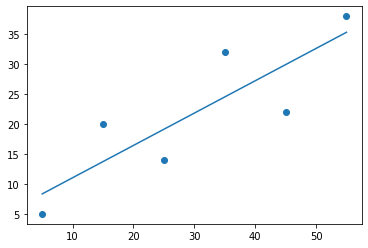

In [16]:
plt.scatter(x,y)
plt.plot(x, y_pred)

In [18]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [17]:
model.predict([[60]])

array([38.03333333])

In [19]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [20]:
model.predict(x)

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

## Multiple Linear Regression With scikit-learn

In [21]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [22]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [23]:
model = LinearRegression().fit(x, y)

In [25]:
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_) # nanti ada B1 dan B2

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [26]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [27]:
model.predict([[70, 40]])

array([47.01847395])

In [28]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polynomial Regression With scikit-learn

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [34]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

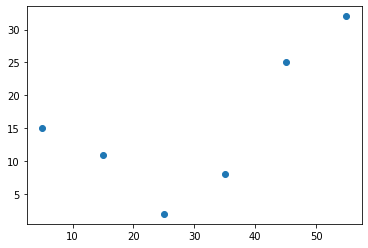

In [31]:
plt.scatter(x, y)

In [32]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [33]:
transformer.fit(x)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [35]:
x_ = transformer.transform(x)

In [37]:
x_ # isinya data awal dan x2 nya di sebelah kanan

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [38]:
model = LinearRegression().fit(x_, y)

In [40]:
r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq) # untuk mengetahui akurasinya berapa %
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


In [41]:
y_pred = model.predict(x_)

In [42]:
y_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

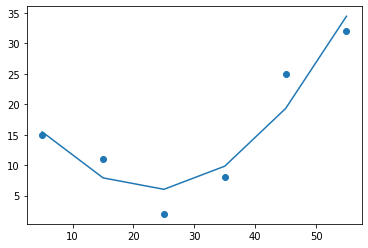

In [46]:
plt.scatter(x, y)
plt.plot(x, y_pred)

## Linear Regression With statsmodels
##### Jika hanya mau model statistik saja hasilnya akan lebih bagus secara statistik

In [48]:
import numpy as np
import statsmodels.api as sm

In [49]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [50]:
print (x, y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] [ 4  5 20 14 32 22 38 43]


In [51]:
x = sm.add_constant(x) # untuk nambahin konstan saja di sebelah kiri karena defaultnya begitu

In [52]:
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [53]:
model = sm.OLS(y, x)

In [54]:
results = model.fit()

In [55]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 28 Jul 2020   Prob (F-statistic):            0.00713
Time:                        20:50:46   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

D:\TITIP TEDJO\ANACONDA\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [59]:
results.rsquared

0.8615939258756777

In [60]:
results.predict(x)

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [61]:
results.predict([[1, 0, 1]])

array([5.77760476])

In [62]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = results.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Implementing Linear Regression on Real Dataset

### Using Statsmodels

In [63]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn

data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [64]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [65]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [67]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [68]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [69]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [70]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [71]:
X = df["RM"]
y = target["MEDV"]

In [72]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):                   3.74e-256
Time:                        21:06:27   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

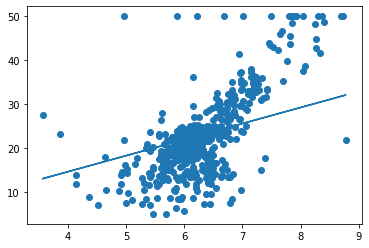

In [77]:
plt.scatter(X, y)
plt.plot(X, predictions)

## Using SKlearn

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library

In [79]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=['MEDV'])


In [80]:
X = df
y = target['MEDV']

In [82]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
predictions = model.predict(X)

In [85]:
model.score(X, y)

0.7406426641094095

### Using SKLearn with Spilt

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [88]:
df.shape

(205, 2)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  205 non-null    int64  
 1   price       205 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


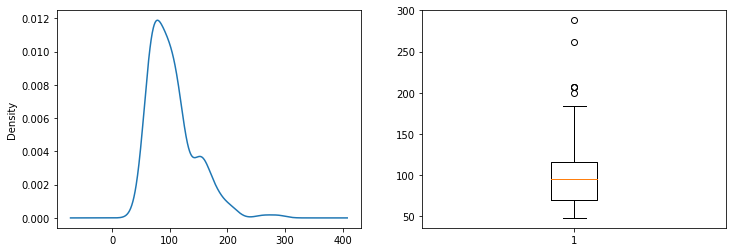

In [91]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

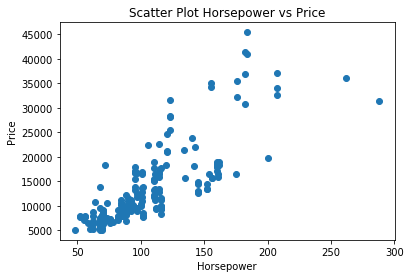

In [92]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [97]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [100]:
x = df['horsepower'].values
y = df['price'].values

In [101]:
x

array([111, 111, 154, 102, 115, 110, 110, 110, 140, 160, 101, 101, 121,
       121, 121, 182, 182, 182,  48,  70,  70,  68,  68, 102,  68,  68,
        68, 102,  88, 145,  58,  76,  60,  76,  76,  76,  76,  86,  86,
        86,  86, 101, 100,  78,  70,  70,  90, 176, 176, 262,  68,  68,
        68,  68,  68, 101, 101, 101, 135,  84,  84,  84,  84,  64,  84,
       120,  72, 123, 123, 123, 123, 155, 155, 184, 184, 175,  68,  68,
        68, 102, 116,  88, 145, 145, 145,  88,  88, 116, 116,  69,  55,
        69,  69,  69,  69,  69,  69,  69,  69,  97,  97, 152, 152, 152,
       160, 200, 160,  97,  95,  97,  95,  95,  95,  95,  95,  97,  95,
       142,  68, 102,  68,  68,  68,  88, 145, 143, 207, 207, 207, 288,
        90,  90, 110, 110, 110, 110, 160, 160,  69,  73,  73,  82,  82,
        94,  82, 111,  82,  94,  82, 111,  62,  62,  62,  62,  62,  62,
        70,  70,  56,  56,  70,  70,  70,  70,  70, 112, 112, 116, 116,
       116, 116, 116, 116,  92,  73,  92,  92,  92, 161, 161, 15

In [102]:
x = df['horsepower'].values.reshape(-1,1) # reshape untuk menghasilkan data dalam bentuk 2 dimensi yaitu x dan y
y = df['price'].values.reshape(-1,1) # -1 menandakan shapenya compatible dengan original shape, simpan saja bentukk originalnya kemudian tambahlan 1 dimensinya

In [103]:
x

array([[111],
       [111],
       [154],
       [102],
       [115],
       [110],
       [110],
       [110],
       [140],
       [160],
       [101],
       [101],
       [121],
       [121],
       [121],
       [182],
       [182],
       [182],
       [ 48],
       [ 70],
       [ 70],
       [ 68],
       [ 68],
       [102],
       [ 68],
       [ 68],
       [ 68],
       [102],
       [ 88],
       [145],
       [ 58],
       [ 76],
       [ 60],
       [ 76],
       [ 76],
       [ 76],
       [ 76],
       [ 86],
       [ 86],
       [ 86],
       [ 86],
       [101],
       [100],
       [ 78],
       [ 70],
       [ 70],
       [ 90],
       [176],
       [176],
       [262],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [101],
       [101],
       [101],
       [135],
       [ 84],
       [ 84],
       [ 84],
       [ 84],
       [ 64],
       [ 84],
       [120],
       [ 72],
       [123],
       [123],
       [123],
       [123],
      

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [105]:
x_train.shape

(164, 1)

In [106]:
x_test.shape

(41, 1)

In [107]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
model.intercept_,model.coef_ # untuk B0 dan B1 nya

(array([-3285.95031597]), array([[158.07361929]]))

In [111]:
model.score(x_test, y_test)

0.6354762652724805

In [112]:
model.predict([[100]])

array([[12521.41161304]])

In [113]:
model.predict([[200]])

array([[28328.77354205]])

In [115]:
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Plot Horsepower vs Price')

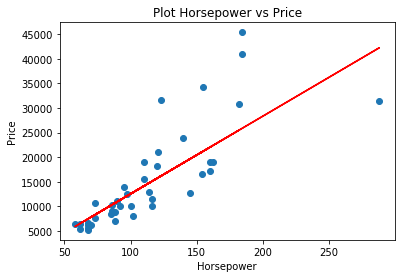

In [116]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

## Linear Regression with  Data from Kaggle

In [119]:
df = pd.read_csv('datasets/datasets_4458_8204_winequality-red.csv')

In [120]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [122]:
x = df.drop(['quality'], axis=1).values
y = df['quality'].values.reshape(-1,1)

In [123]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [124]:
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [126]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
model.intercept_,model.coef_ # untuk B0 dan B1 nya

(array([33.59931181]),
 array([[ 1.44407773e-02, -1.02041695e+00, -1.88538813e-02,
          1.06732744e-02, -1.60597084e+00,  4.11459192e-03,
         -3.50121035e-03, -2.86471696e+01, -6.69900958e-01,
          9.64719193e-01,  2.68996358e-01]]))

In [128]:
model.score(x_test, y_test)

0.31840352929737803

In [132]:
y_pred = model.predict(x_test)

ValueError: x and y must be the same size

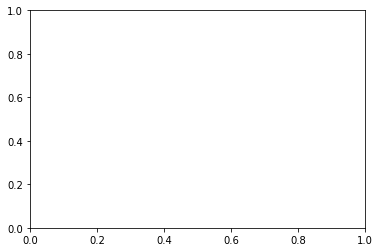

In [134]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')